In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import re

In [3]:
df = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\results.csv")

In [4]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [13]:
def teamWon(df):
    if(df['home_score']>df['away_score']):
        return df.home_team
    elif(df['home_score']<df['away_score']):
        return df.away_team
    elif(df['home_score']==df['away_score']):
        return 0
    

In [14]:
df["TeamWon"] = df.apply(teamWon,axis = 1)

In [35]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,TeamWon,BrazilWon,Year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,0,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,0,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,0,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,0,1876


In [23]:
df.TeamWon.value_counts()

0                9700
Brazil            629
England           580
Germany           560
Argentina         529
                 ... 
Micronesia          1
Gozo                1
San Marino          1
Asturias            1
Romani people       1
Name: TeamWon, Length: 301, dtype: int64

In [26]:
df['BrazilWon'] = np.where(df.TeamWon == "Brazil",1,0)

In [33]:
newdate = df["date"].str.split("-",n=1, expand = True) 
newdate.head()

,0,1
0,1872,11-30
1,1873,03-08
2,1874,03-07
3,1875,03-06
4,1876,03-04


In [34]:
# combing year values as a new column to df
df['Year'] = newdate[0]

In [77]:
# grouping based on year and summarizing the number of matches brazil won
df_ = df.groupby(['Year'])['BrazilWon'].sum()
df_ = df_.to_frame()
df_.head()
df_ = df_.reset_index()

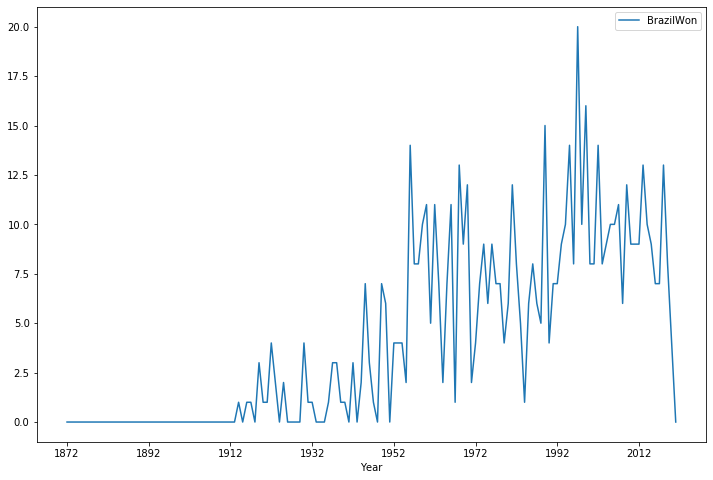

In [83]:
df_.plot(kind = 'line', x ='Year', y = 'BrazilWon', figsize=(12,8) )

In [90]:
df1 = df.groupby(['Year','TeamWon'])

In [91]:
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,TeamWon,BrazilWon,Year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,0,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,0,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,0,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,0,1876
...,...,...,...,...,...,...,...,...,...,...,...,...
42077,2021-03-31,Andorra,Hungary,1,4,FIFA World Cup qualification,Andorra la Vella,Andorra,False,Hungary,0,2021
42078,2021-03-31,San Marino,Albania,0,2,FIFA World Cup qualification,Serravalle,San Marino,False,Albania,0,2021
42079,2021-03-31,Armenia,Romania,3,2,FIFA World Cup qualification,Yerevan,Armenia,False,Armenia,0,2021
42080,2021-03-31,Germany,North Macedonia,1,2,FIFA World Cup qualification,Duisburg,Germany,False,North Macedonia,0,2021
